In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
fifa21_df=pd.read_csv("fifa21_male2.csv")
fifa21_df=fifa21_df.drop(columns=["ID"])
fifa21_df.head()

/tmp/ipykernel_72258/639874510.py:1: DtypeWarning: Columns (78) have mixed types. Specify dtype option on import or set low_memory=False.
  fifa21_df=pd.read_csv("fifa21_male2.csv")


,Name,Age,OVA,Nationality,Club,BOV,BP,Position,Player Photo,Club Logo,...,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,GK,Gender
0,G. Pasquale,33,69,Italy,Udinese,71,LWB,LM,https://cdn.sofifa.com/players/000/002/16_120.png,https://cdn.sofifa.com/teams/55/light_60.png,...,70+-1,70+-1,71+-2,70+-1,69+0,69+0,69+0,70+-1,17+0,Male
1,Luis García,37,71,Spain,KAS Eupen,70,CM,CM CAM CDM,https://cdn.sofifa.com/players/000/016/19_120.png,https://cdn.sofifa.com/teams/2013/light_60.png,...,66+1,66+1,62+1,60+1,60+1,60+1,60+1,60+1,17+1,Male
2,J. Cole,33,71,England,Coventry City,71,CAM,CAM RM RW LM,https://cdn.sofifa.com/players/000/027/16_120.png,https://cdn.sofifa.com/teams/1800/light_60.png,...,54+0,54+0,52+0,47+0,46+0,46+0,46+0,47+0,15+0,Male
3,D. Yorke,36,68,Trinidad &amp; Tobago,Sunderland,70,ST,NaN,https://cdn.sofifa.com/players/000/036/09_120.png,https://cdn.sofifa.com/teams/106/light_60.png,...,65+0,65+0,56+0,57+0,51+0,51+0,51+0,57+0,22+0,Male
4,Iniesta,36,81,Spain,Vissel Kobe,82,CAM,CM CAM,https://cdn.sofifa.com/players/000/041/20_120.png,https://cdn.sofifa.com/teams/101146/light_60.png,...,73+3,73+3,70+3,67+3,64+3,64+3,64+3,67+3,17+3,Male


In [3]:
fifa21_df.dtypes

Name           object
Age             int64
OVA             int64
Nationality    object
Club           object
                ...  
CB             object
RCB            object
RB             object
GK             object
Gender         object
Length: 106, dtype: object

In [4]:
fifa21_df.isna().sum()

Name            0
Age             0
OVA             0
Nationality     0
Club           23
               ..
CB              0
RCB             0
RB              0
GK              0
Gender          0
Length: 106, dtype: int64

## Filling missing values

In [5]:
threshold=len(fifa21_df)*0.05
threshold

856.25

In [6]:
col_to_drop=fifa21_df.columns[fifa21_df.isna().sum()<=threshold]
col_to_drop

Index(['Name', 'Age', 'OVA', 'Nationality', 'Club', 'BOV', 'BP', 'Position',
       'Player Photo', 'Club Logo',
       ...
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GK', 'Gender'],
      dtype='object', length=105)

In [7]:
fifa21_df.dropna(subset=col_to_drop,inplace=True)

In [8]:
col_with_missing_values=fifa21_df.columns[fifa21_df.isna().sum()>0]
col_with_missing_values

Index(['Loan Date End'], dtype='object')

In [9]:
fifa21_df["Loan Date End"]=fifa21_df["Loan Date End"].fillna(fifa21_df["Loan Date End"].mode()[0])

In [10]:
fifa21_df["Loan Date End"].isna().sum()

0

## What is the nationwise participation in the Game?

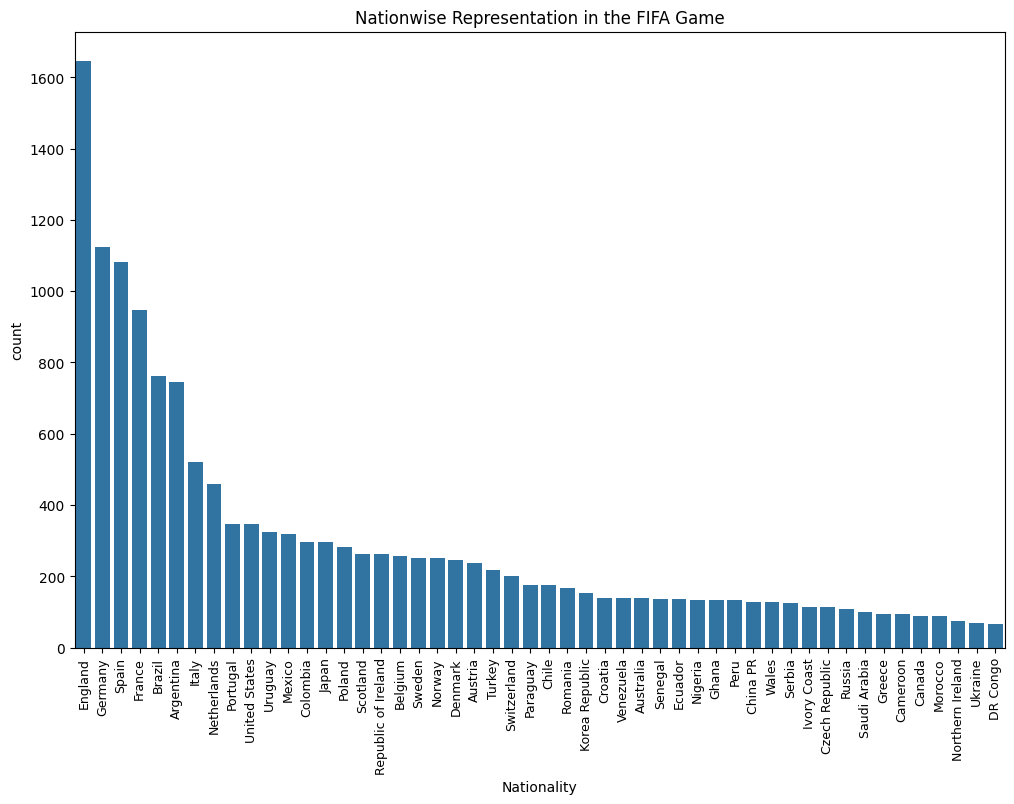

In [11]:
plt.figure(figsize=(12, 8))
sns.countplot(data=fifa21_df, x="Nationality", order=fifa21_df["Nationality"].value_counts().head(50).index)
plt.xticks(rotation=90, fontsize=9)
plt.title("Nationwise Representation in the FIFA Game")
plt.show()

## Count of players position wise

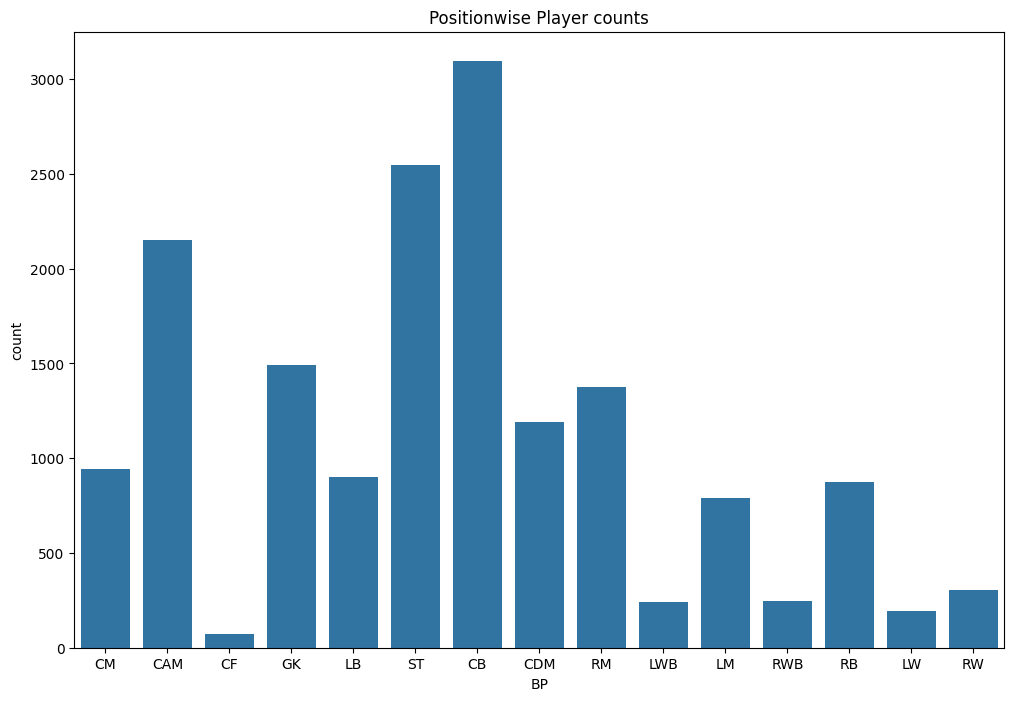

In [12]:
plt.figure(figsize=(12, 8))
sns.countplot(data=fifa21_df, x="BP")
plt.title("Positionwise Player counts")
plt.show()

## What is the age Distribution of the players?

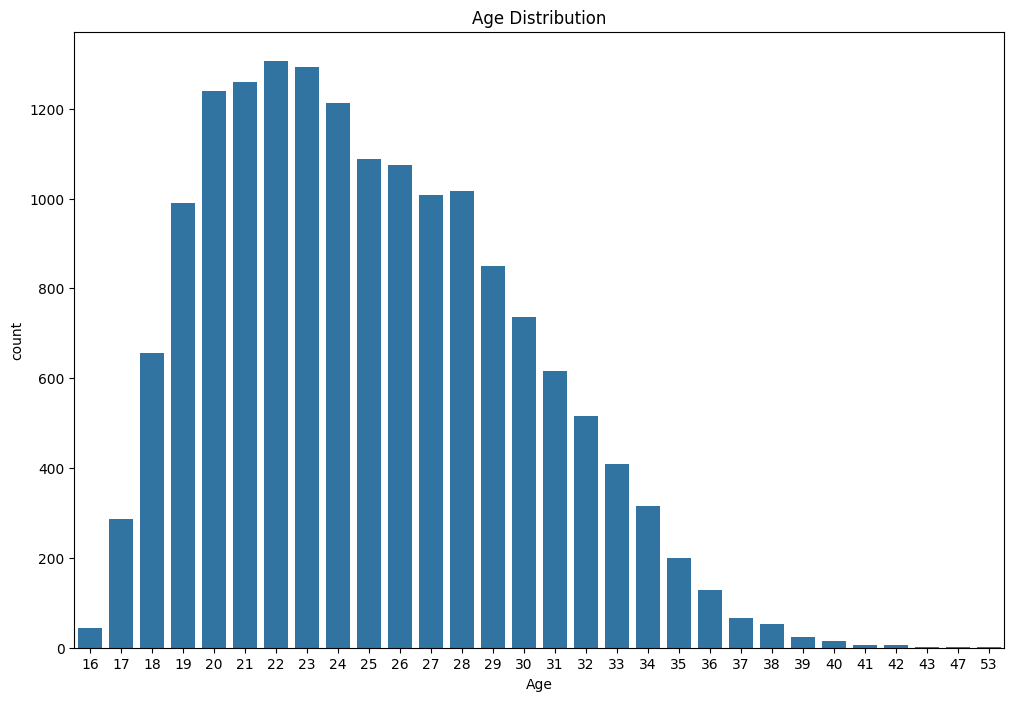

In [13]:
plt.figure(figsize=(12, 8))
sns.countplot(data=fifa21_df, x="Age",)
plt.title("Age Distribution")
plt.show()

## Who are the best players in the game?

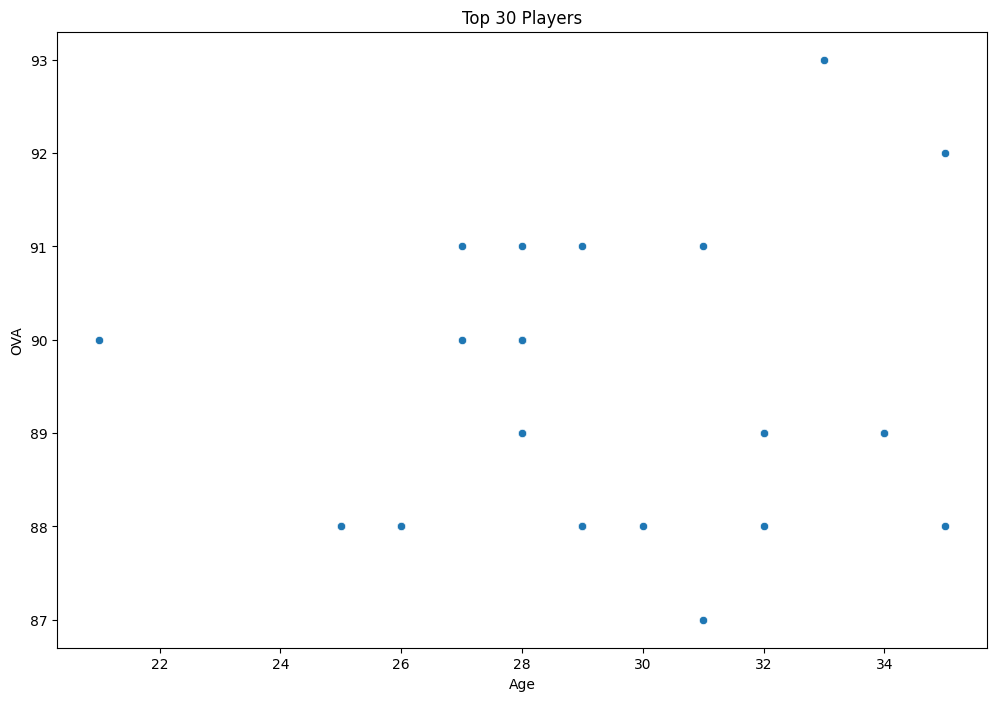

In [14]:
top_30_players=fifa21_df.sort_values("OVA",ascending=False).head(30)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=top_30_players, x="Age",y="OVA")
plt.title("Top 30 Players")
plt.show()

## Best team in the game

In [15]:
best_team_rating=fifa21_df.groupby("BP").apply(lambda x:np.max(x["OVA"])).reset_index(name="Rating")
best_team_info=fifa21_df[["Name","Club","Age","BP","OVA"]]
best_team=best_team_info.merge(best_team_rating,left_on=["BP","OVA"],right_on=["BP","Rating"])
best_team=best_team[["Name","Club","Age","BP","Rating"]].sort_values("Rating")
best_team


,Name,Club,Age,BP,Rating
3,Filipe Luís,Atlético Madrid,32,LWB,85
12,S. Gnabry,FC Bayern München,24,RM,85
13,M. Rashford,Manchester United,22,RM,85
8,H. Son,Tottenham Hotspur,27,LM,87
14,A. Robertson,Liverpool,26,LB,87
15,T. Alexander-Arnold,Liverpool,21,RB,87
1,P. Lahm,FC Bayern München,32,RWB,88
5,T. Kroos,Real Madrid,30,CM,88
4,K. Benzema,Real Madrid,32,CF,89
9,Casemiro,Real Madrid,28,CDM,89


In [16]:
best_team["Age"].agg("mean")

28.375

## Real Madrid Team

In [17]:
real_madrid=fifa21_df[ fifa21_df["Club"] =="Real Madrid" ]
real_madrid_rating=real_madrid.groupby("BP").apply(lambda x:np.max(x["OVA"])).reset_index(name="Rating")
real_madrid_info=real_madrid[["Name","Club","Age","BP","OVA"]]
real_madrid_main_squad=real_madrid_info.merge(real_madrid_rating,left_on=["BP","OVA"],right_on=["BP","Rating"])
real_madrid_main_squad=real_madrid_main_squad[["Name","Club","Age","BP","Rating"]].sort_values("Rating")
real_madrid_main_squad


,Name,Club,Age,BP,Rating
10,Lucas Vázquez,Real Madrid,29,RW,80
11,L. Jović,Real Madrid,22,ST,80
12,Vinícius Jr.,Real Madrid,19,RM,80
2,Marcelo,Real Madrid,32,LB,83
3,F. Mendy,Real Madrid,25,LB,83
7,Isco,Real Madrid,28,CAM,84
9,Carvajal,Real Madrid,28,RB,86
4,T. Kroos,Real Madrid,30,CM,88
5,E. Hazard,Real Madrid,29,LW,88
0,Sergio Ramos,Real Madrid,34,CB,89


In [18]:
real_madrid_main_squad["Age"].agg("mean")

28.0